<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
import pandas as pd
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from gensim.models import LsiModel
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install bertopic

In [ ]:
from google.colab import files
file = files.upload()

Saving data (2).csv to data (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('data (2).csv')

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
df = df.drop_duplicates(ignore_index=True)

In [ ]:
stop_word = stopwords.words('english')
stop_word += ['com', 'ect', 'www', 'email', 'one', 'two', 'shall', 'will','muzo','edt','cds','sav','ong','vnbl','pll','dik','btu','shl','wiil','eet','mmjx','spfa','may','could','like','may','hou','edu','ees','also','let','get','much','give','make','want','know','http','would','take','need']
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(text): #text cleaning 
    text = text.lower() #text lowering
    tokenzie_text = word_tokenize(text)
    without_punt = [word for word in tokenzie_text if word not in string.punctuation] #removing puctuncations
    without_stop_w = [word for word in without_punt if word not in stop_word] # removing stop_words
    without_num = []
    for word in without_stop_w: #forloop for removing the digits
        if word.isdigit():
            continue
        if word.isalnum():
            word = list(word)
            words = [i for i in word if i not in p]
            word = ''.join(words)
            without_num.append(word)
        else:
            without_num.append(word)
    without_len1_2 = [word for word in without_num if len(word) >=3]
    return without_len1_2

In [ ]:
df['Sentence'] = df['Sentence'].apply(text_manipulation)

<ipython-input-14-1ff66807604c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentence'] = df['Sentence'].apply(text_manipulation)


In [ ]:
vocubulary = list()
for word_list in df['Sentence']: #for loop for getting the count of each words
   vocubulary.append(word_list)

## features(text) used for topic model

In [ ]:
vocubulary # features

[['geosolutions',
  'technology',
  'leverage',
  'benefon',
  'gps',
  'solutions',
  'providing',
  'location',
  'based',
  'search',
  'technology',
  'communities',
  'platform',
  'location',
  'relevant',
  'multimedia',
  'content',
  'new',
  'powerful',
  'commercial',
  'model'],
 ['esi', 'lows', '1.50', '2.50', 'real', 'possibility'],
 ['last',
  'quarter',
  'componenta',
  'net',
  'sales',
  'doubled',
  'eurm',
  'eurm',
  'period',
  'year',
  'earlier',
  'moved',
  'zero',
  'pre-tax',
  'profit',
  'pre-tax',
  'loss',
  'eurm'],
 ['according',
  'finnish-russian',
  'chamber',
  'commerce',
  'major',
  'construction',
  'companies',
  'finland',
  'operating',
  'russia'],
 ['swedish',
  'buyout',
  'firm',
  'sold',
  'remaining',
  '22.4',
  'percent',
  'stake',
  'almost',
  'eighteen',
  'months',
  'taking',
  'company',
  'public',
  'finland'],
 ['spy', "n't", 'surprised', 'see', 'green', 'close'],
 ['shell', 'billion', 'deal', 'meets', 'shareholder', 'ske

In [ ]:
id2word = corpora.Dictionary(list(vocubulary))

# Create Corpus
texts = vocubulary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2)]]


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    c_v = []
    m_l = []
    for k in range(start, limit, step):
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        m_l.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())

    return m_l, c_v

In [ ]:
m_l, c_v = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=vocubulary, start=2, limit=40, step=6)

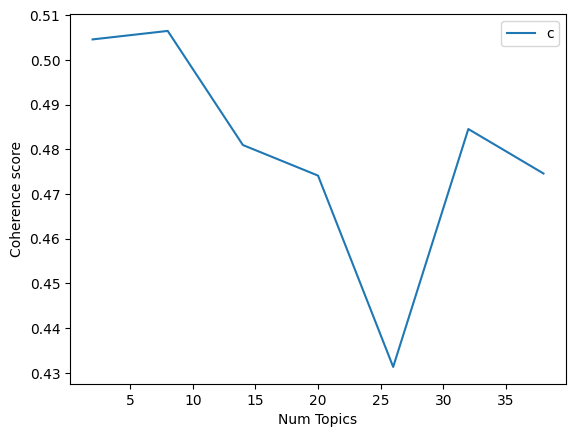

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
i = 0
for k in range(start, limit, step):
  print("Model : "+str(i))
  print("k-value : "+str(k))
  print('Perplexity: ', m_l[i].log_perplexity(corpus))  
  print('Coherence Score: ', c_v[i])
  print('*'*10)
  i+=1

Model : 0
k-value : 2
Perplexity:  -8.412457667092898
Coherence Score:  0.5045851234160916
**********
Model : 1
k-value : 8
Perplexity:  -9.163021100756787
Coherence Score:  0.5064852822695886
**********
Model : 2
k-value : 14
Perplexity:  -13.488206762111314
Coherence Score:  0.4809538624035942
**********
Model : 3
k-value : 20
Perplexity:  -20.285279596086465
Coherence Score:  0.47411108294132404
**********
Model : 4
k-value : 26
Perplexity:  -23.898161943752868
Coherence Score:  0.4312986495094374
**********
Model : 5
k-value : 32
Perplexity:  -27.589802687602454
Coherence Score:  0.48453229415133986
**********
Model : 6
k-value : 38
Perplexity:  -31.257168452646226
Coherence Score:  0.4745837588877463
**********


In [ ]:
model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## top 10 clusters topic modelin

In [ ]:
model_topics = model.show_topics(formatted=False)
for i in model_topics:
  print(i)

(0, [('services', 0.038480155), ('products', 0.030598551), ('increased', 0.02278604), ('revenue', 0.016525546), ('customers', 0.014914646), ('market', 0.014503869), ('global', 0.013746696), ('research', 0.012032518), ('ceo', 0.0118094925), ('used', 0.011090884)])
(1, [('market', 0.020993399), ('percent', 0.01913899), ('companies', 0.012972718), ('nokia', 0.0122961085), ('yit', 0.0115029905), ('part', 0.011274074), ('mobile', 0.01042396), ('manufacturing', 0.010003911), ('management', 0.009554794), ('maker', 0.008977275)])
(2, [('eur', 0.14123903), ('sales', 0.058173954), ('net', 0.056855276), ('profit', 0.048800256), ('operating', 0.030064207), ('year', 0.027450208), ('period', 0.027132805), ('first', 0.026910884), ('quarter', 0.025921453), ('loss', 0.019109596)])
(3, [('company', 0.081951365), ('new', 0.03566099), ('finland', 0.034052074), ('finnish', 0.030409103), ('group', 0.030285982), ('said', 0.024471605), ('according', 0.017154194), ('financial', 0.015378016), ('line', 0.0148483

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
df = pd.read_csv('data (2).csv')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
df = df.drop_duplicates(ignore_index=True)

In [ ]:
df = df.dropna()

In [ ]:
def label_changer(x):
  if x == 'positive':
    return 1
  elif x == 'negative':
    return 0
  else:
    return 2

In [ ]:
df['Sentiment'] = df['Sentiment'].apply(label_changer)

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",1
3,According to the Finnish-Russian Chamber of Co...,2
4,The Swedish buyout firm has sold its remaining...,2
...,...,...
5831,RISING costs have forced packaging producer Hu...,0
5832,Nordic Walking was first used as a summer trai...,2
5833,"According shipping company Viking Line , the E...",2
5834,"In the building and home improvement trade , s...",2


In [ ]:
stop_word = stopwords.words('english')
stop_word += ['com', 'ect', 'www', 'email', 'one', 'two', 'shall', 'will','muzo','edt','cds','sav','ong','vnbl','pll','dik','btu','shl','wiil','eet','mmjx','spfa','may','could','like','may','hou','edu','ees','also','let','get','much','give','make','want','know','http','would','take','need']
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(text):
    text = text.lower() 
    tokenzie_text = word_tokenize(text)
    without_punt = [word for word in tokenzie_text if word not in string.punctuation]
    without_stop_w = [word for word in without_punt if word not in stop_word]
    without_num = []
    for word in without_stop_w:
        if word.isdigit():
            continue
        if word.isalnum():
            word = list(word)
            words = [i for i in word if i not in p]
            word = ''.join(words)
            without_num.append(word)
        else:
            without_num.append(word)
    without_len1_2 = [word for word in without_num if len(word) >=3]
    return without_len1_2
      

In [ ]:
df['Sentence'] = df['Sentence'].apply(text_manipulation)

In [ ]:
vocubulary = Counter()
for word_list in df['Sentence']:
    for word in word_list:
        vocubulary[word] += 1
        
print(vocubulary)

Counter({'eur': 1625, 'company': 807, 'profit': 568, 'sales': 560, 'finnish': 527, 'said': 516, 'net': 499, 'million': 494, 'operating': 371, 'mln': 349, 'period': 331, 'year': 330, 'group': 323, 'finland': 318, 'quarter': 311, 'share': 283, 'new': 274, 'oyj': 250, 'business': 246, 'first': 240, 'market': 230, 'shares': 229, 'loss': 220, 'euro': 209, 'compared': 199, 'today': 198, 'services': 194, 'helsinki': 168, 'corresponding': 158, 'per': 150, 'operations': 150, 'percent': 144, 'total': 144, 'contract': 143, 'financial': 135, 'price': 133, 'https': 132, 'bank': 131, 'decreased': 131, 'nokia': 126, 'hel': 124, 'products': 123, 'stock': 122, 'corporation': 118, 'according': 115, 'pct': 115, 'capital': 114, 'production': 113, 'increased': 109, 'mobile': 108, 'plant': 107, 'last': 105, 'companies': 105, 'well': 104, 'solutions': 103, 'earlier': 103, 'value': 102, 'rose': 101, 'technology': 100, 'eurm': 100, 'investment': 99, 'omx': 99, 'result': 99, 'usd': 98, 'plc': 98, 'deal': 97, 'u

## Features selcetd for model

In [ ]:
top_100_voc = {k: v for k, v in sorted(vocubulary.items(), key=lambda item: item[1], reverse=True)}
top_100_voc = {k:vocubulary[k] for k in list(top_100_voc.keys())[:100]}

In [ ]:
top_100_voc

{'eur': 1625,
 'company': 807,
 'profit': 568,
 'sales': 560,
 'finnish': 527,
 'said': 516,
 'net': 499,
 'million': 494,
 'operating': 371,
 'mln': 349,
 'period': 331,
 'year': 330,
 'group': 323,
 'finland': 318,
 'quarter': 311,
 'share': 283,
 'new': 274,
 'oyj': 250,
 'business': 246,
 'first': 240,
 'market': 230,
 'shares': 229,
 'loss': 220,
 'euro': 209,
 'compared': 199,
 'today': 198,
 'services': 194,
 'helsinki': 168,
 'corresponding': 158,
 'per': 150,
 'operations': 150,
 'percent': 144,
 'total': 144,
 'contract': 143,
 'financial': 135,
 'price': 133,
 'https': 132,
 'bank': 131,
 'decreased': 131,
 'nokia': 126,
 'hel': 124,
 'products': 123,
 'stock': 122,
 'corporation': 118,
 'according': 115,
 'pct': 115,
 'capital': 114,
 'production': 113,
 'increased': 109,
 'mobile': 108,
 'plant': 107,
 'last': 105,
 'companies': 105,
 'well': 104,
 'solutions': 103,
 'earlier': 103,
 'value': 102,
 'rose': 101,
 'technology': 100,
 'eurm': 100,
 'investment': 99,
 'omx': 9

In [ ]:
features = list(top_100_voc.keys())
features

['eur',
 'company',
 'profit',
 'sales',
 'finnish',
 'said',
 'net',
 'million',
 'operating',
 'mln',
 'period',
 'year',
 'group',
 'finland',
 'quarter',
 'share',
 'new',
 'oyj',
 'business',
 'first',
 'market',
 'shares',
 'loss',
 'euro',
 'compared',
 'today',
 'services',
 'helsinki',
 'corresponding',
 'per',
 'operations',
 'percent',
 'total',
 'contract',
 'financial',
 'price',
 'https',
 'bank',
 'decreased',
 'nokia',
 'hel',
 'products',
 'stock',
 'corporation',
 'according',
 'pct',
 'capital',
 'production',
 'increased',
 'mobile',
 'plant',
 'last',
 'companies',
 'well',
 'solutions',
 'earlier',
 'value',
 'rose',
 'technology',
 'eurm',
 'investment',
 'omx',
 'result',
 'usd',
 'plc',
 'deal',
 'unit',
 'third',
 'fell',
 'increase',
 'service',
 'order',
 'second',
 'construction',
 'customers',
 'board',
 'ceo',
 'building',
 'billion',
 'aapl',
 'part',
 'half',
 'industry',
 'expected',
 'earnings',
 'growth',
 'agreement',
 'maker',
 'long',
 'developmen

## we choose 100 words as features which have highest word count occuring in the text which help us to train the model and also help us to find the difference between 3 differnt categories data(that is positive, negative and neutral)

In [ ]:
def term_document_matrix(word_list):
    term_matrix = dict()
    for word in features:
        if(word in word_list):
            occ = word_list.count(word)
            term_matrix[word] = occ
        else:
            term_matrix[word] = 0
    return term_matrix

In [ ]:
df['Sentence']= df['Sentence'].apply(term_document_matrix)

In [ ]:
features.append('Sentiment')

In [ ]:
matrix = pd.DataFrame(columns=features)

In [ ]:
c = 0
for col, row in df.iterrows():
    val = list(row['Sentence'].values())
    if(sum(val) > 0):
        val.append(row['Sentiment'])
        matrix.loc[c] = val
        c+=1

In [ ]:
matrix

,eur,company,profit,sales,finnish,said,net,million,operating,mln,...,lower,end,buy,media,project,markets,news,totalled,management,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4840,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4841,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
matrix.dropna()

,eur,company,profit,sales,finnish,said,net,million,operating,mln,...,lower,end,buy,media,project,markets,news,totalled,management,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4840,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4841,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
x = matrix.iloc[:,:-1] 
y = matrix['Sentiment']

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import scikitplot as skplt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
^C


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3874, 100)
(3874,)
(969, 100)
(969,)


## Here i am selcting DecisionTree and multinomial naive base classifier reason for choosing these is these are best algorithms which shows best results in text classification

### DecisionTree

In [ ]:
dec_model = DecisionTreeClassifier(max_depth=4)


#### cross fold validation

In [ ]:
dec_m=model_selection.cross_val_score(dec_model, x_train, y_train, cv=5)
print("mean : ",np.mean(dec_m),"  variance : " ,np.var(dec_m))
print(dec_m)

mean :  0.5882787363507543   variance :  3.302553514792251e-05
[0.58580645 0.58580645 0.59483871 0.59483871 0.58010336]


In [ ]:
his = dec_model.fit(x_train, y_train)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

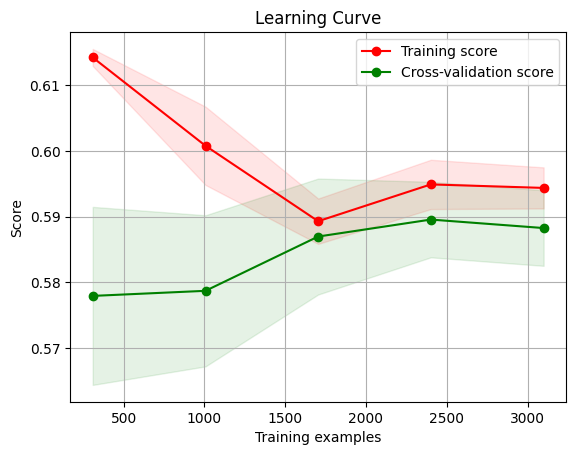

In [ ]:
skplt.estimators.plot_learning_curve(dec_model,x_train, y_train)

In [ ]:
dec_mod_est = dec_model.predict(x_test)

In [ ]:
print(classification_report(y_test, dec_mod_est))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05       138
           1       0.80      0.18      0.29       317
           2       0.57      0.97      0.72       514

    accuracy                           0.58       969
   macro avg       0.55      0.39      0.35       969
weighted avg       0.60      0.58      0.48       969



### Multinomial Naive Bayes

In [ ]:
mul_nav_model = MultinomialNB()

#### Cross fold validation

In [ ]:
mn_m=model_selection.cross_val_score(mul_nav_model, x, y, cv=5)
print("mean : ",np.mean(mn_m),"  variance : " ,np.var(mn_m))
print(mn_m)

mean :  0.6043776492763264   variance :  0.00018589701011819206
[0.58617131 0.6130031  0.6130031  0.61983471 0.58987603]


In [ ]:
his1 = mul_nav_model.fit(x_train, y_train)

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

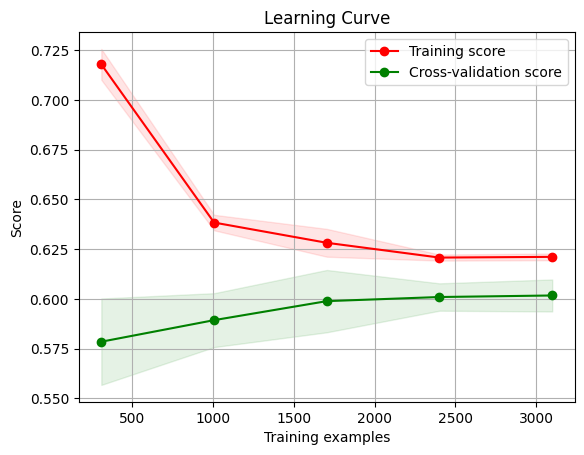

In [ ]:
skplt.estimators.plot_learning_curve(mul_nav_model,x_train, y_train)

In [ ]:
mul_est = mul_nav_model.predict(x_test)


In [ ]:
print(classification_report(y_test, mul_est))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       138
           1       0.67      0.40      0.50       317
           2       0.66      0.82      0.73       514

    accuracy                           0.60       969
   macro avg       0.53      0.50      0.50       969
weighted avg       0.61      0.60      0.59       969



## Model Comparsion

From the classification report of the both model we observe that the accurcy of multinomial navive bayes yield best accuracy than the decision tree it is because of the multinomial naive bayes works on each word probability whereas the decision tree works on best splits and given depth here we gave depth as 4 which may leads to poor accuracy

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
files = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
l = list(train.columns)
l

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [ ]:
train = train.dropna(axis='columns')

In [ ]:
p = list(train.columns)

In [ ]:
z = list()
for i in l:
    if i in p:
        z.append(i)

In [ ]:
z.remove('SalePrice')

In [ ]:
new_test = pd.DataFrame(columns = z)
for i in z:
    new_test[i] = test[i]

In [ ]:
train = train.dropna()
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
new_test = new_test.dropna()

In [ ]:
new_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [ ]:
s = list()
for i in list(train.columns):
    if(train[i].dtypes == 'object'):
        s.append(i)
s.append('Id')

In [ ]:
train = train.drop(s, axis = 1)
train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
test = new_test.drop(s, axis = 1)
test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
X = train.drop('SalePrice', axis = 1)
Y = train['SalePrice']

In [ ]:
x = X.values 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns = list(X.columns))

In [ ]:
x

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.125089,0.000000,0.064212,0.140098,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.173281,0.000000,0.121575,0.206547,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.086109,0.000000,0.185788,0.150573,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.038271,0.000000,0.231164,0.123732,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.116052,0.000000,0.209760,0.187398,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.407962,0.155974,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.055505,0.555556,0.625,0.768116,0.633333,0.139972,0.110583,0.252140,0.252373,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.036187,0.666667,1.000,0.500000,0.933333,0.048724,0.000000,0.375428,0.188543,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.039342,0.444444,0.625,0.565217,0.766667,0.008682,0.698100,0.000000,0.176432,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()
model.fit(x, Y)

LinearRegression()

In [ ]:
x = test.values 
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test = pd.DataFrame(x_scaled, columns = list(test.columns))

In [ ]:
predictions = model.predict(test)

## predictions for test data

In [ ]:
for i in predictions:
    print(i)

99396.07013825508
135356.6933175643
156924.34080508375
178081.13291006917
175857.42834769093
160251.84087957864
171936.55376793168
146719.26459337465
192511.37306007958
86417.55990360829
184623.98234573146
73321.68438369222
48419.43435227471
119014.0819646958
90370.65517492782
302462.5844044052
224770.08181653573
257536.99642626249
250885.7024419178
373205.5710638879
279139.0146878121
191038.60735744255
164555.8483886926
146667.51358750678
180216.2636368687
188399.4390027463
273859.17162729247
233676.02611251146
167158.43643352785
217079.4105479241
192105.36148288212
66211.07607039846
182236.68279540012
260377.76502809982
260854.80201345612
203305.2194953853
149391.90658245364
128599.4806515243
137617.3362009242
119835.23225612708
141976.35929206168
119112.44760549368
274298.15013742057
230006.87382515206
204000.5746147651
180562.69538926604
237476.30142126244
200684.18107617195
132526.96032100206
117831.13466164973
125390.35868593465
160368.54696950706
146159.38293547084
120118.254278